# 1. Business Understanding

## 1.1 Цель

Предсказать качество вина

## 1.2 Описание

Информация о данных:

Данные относятся к красному и белому вариантам португальского вина "Vinho Verde". Из-за проблем конфиденциальности и логистики доступны только физико-химические (входные данные) и сенсорные (выходные данные) переменные (например, нет данных о сортах винограда, марке вина, цене продажи вина и т. д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, в Мунке больше нормальных вин, чем отличных или плохих). Алгоритмы обнаружения выбросов могут быть использованы для обнаружения нескольких превосходных или плохих вин. Кроме того, мы не уверены, что все входные переменные релевантны. Поэтому было бы интересно проверить методы выбора объектов.

Два набора данных были объединены, и несколько значений были удалены случайным образом.

Атрибутивная информация:

Для получения дополнительной информации прочтите [Cortez et al., 2009].
Входные переменные (на основе физико-химических тестов):
- 1 - fixed acidity (фиксированная кислотность)
- 2 - volatile acidity (летучая кислотность)
- 3 - citric acid (лимонная кислота)
- 4 - residual sugar (остаточный сахар)
- 5 - chlorides (хлориды)
- 6 - free sulfur dioxide (свободный диоксид серы)
- 7 - total sulfur dioxide (общий диоксид серы)
- 8 - density (плотность)
- 9 - pH (рН)
- 10 - sulphates (сульфаты)
- 11 - алкоголь (alcohol)

Выходная переменная (на основе сенсорных данных):

- 12 - quality (качество - оценка от 0 до 10 баллов)





# 2. Data Understanding

## 2.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from scipy.stats import norm 


import warnings
warnings.filterwarnings('ignore')

## 2.2 Загрузка данных

In [2]:
df = pd.read_csv('winequalityN.csv')
print(df.shape)

(6497, 13)


## 2.3 Статистика и визуализации

In [3]:
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# Количество нулей в данных
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### 2.3.1 Ключевая информация о переменных


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


### 2.3.2 Тепловая карта корреляции может дать нам понимание того, какие переменные важны

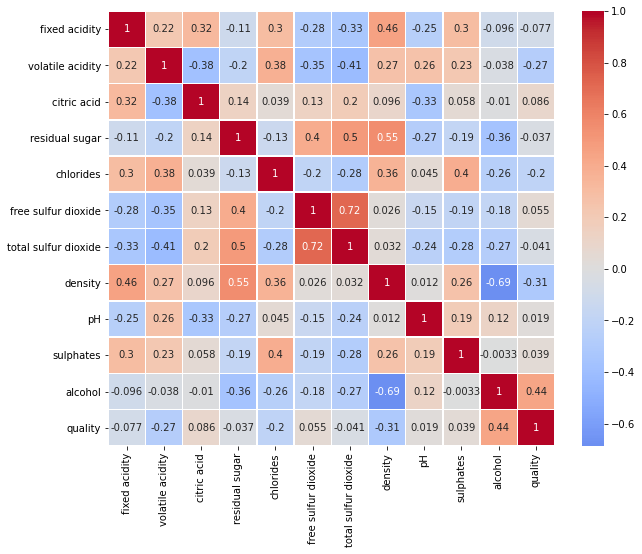

In [7]:
plt.figure(figsize=(10,8))
#sns.heatmap(df.corr(),annot=True,linewidths=.5,center=0,cbar=False,cmap="YlGnBu")
sns.heatmap(df.corr(),annot=True,linewidths=.5,center=0,cmap="coolwarm")
plt.show()

### 2.3.3 Распределение переменых

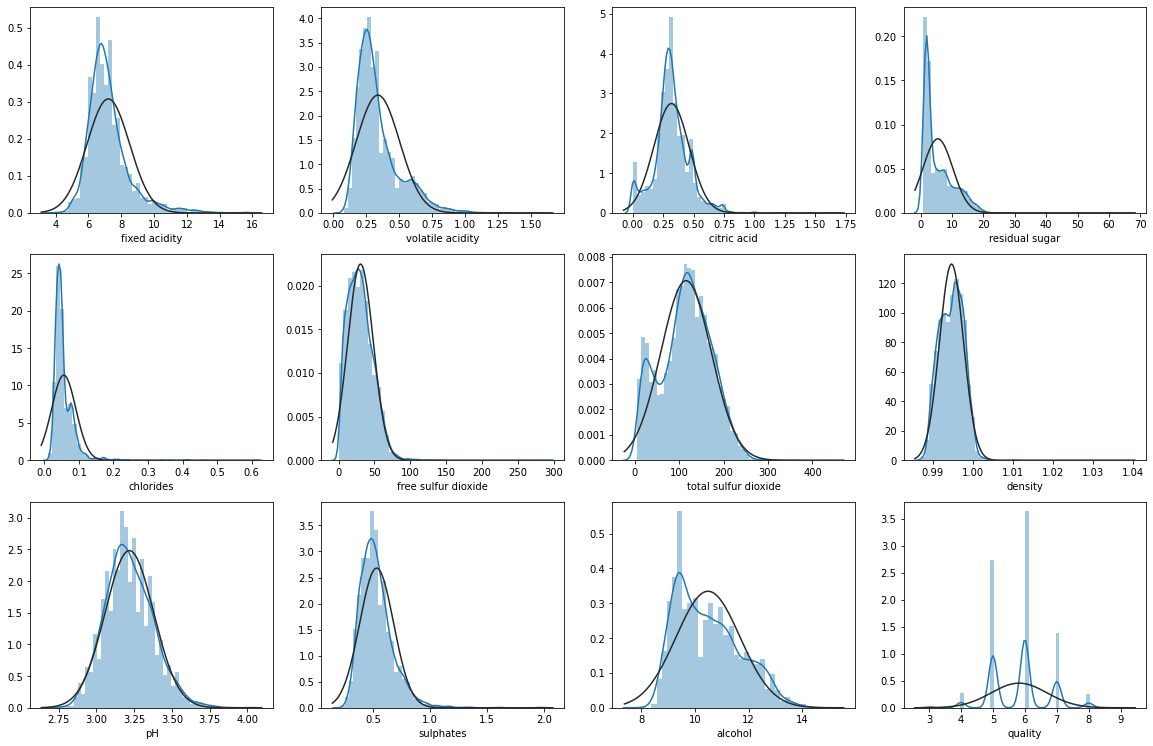

In [8]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(df[df.columns[i]], fit=norm)

### 2.3.4 Распределение переменых относительно друг друга

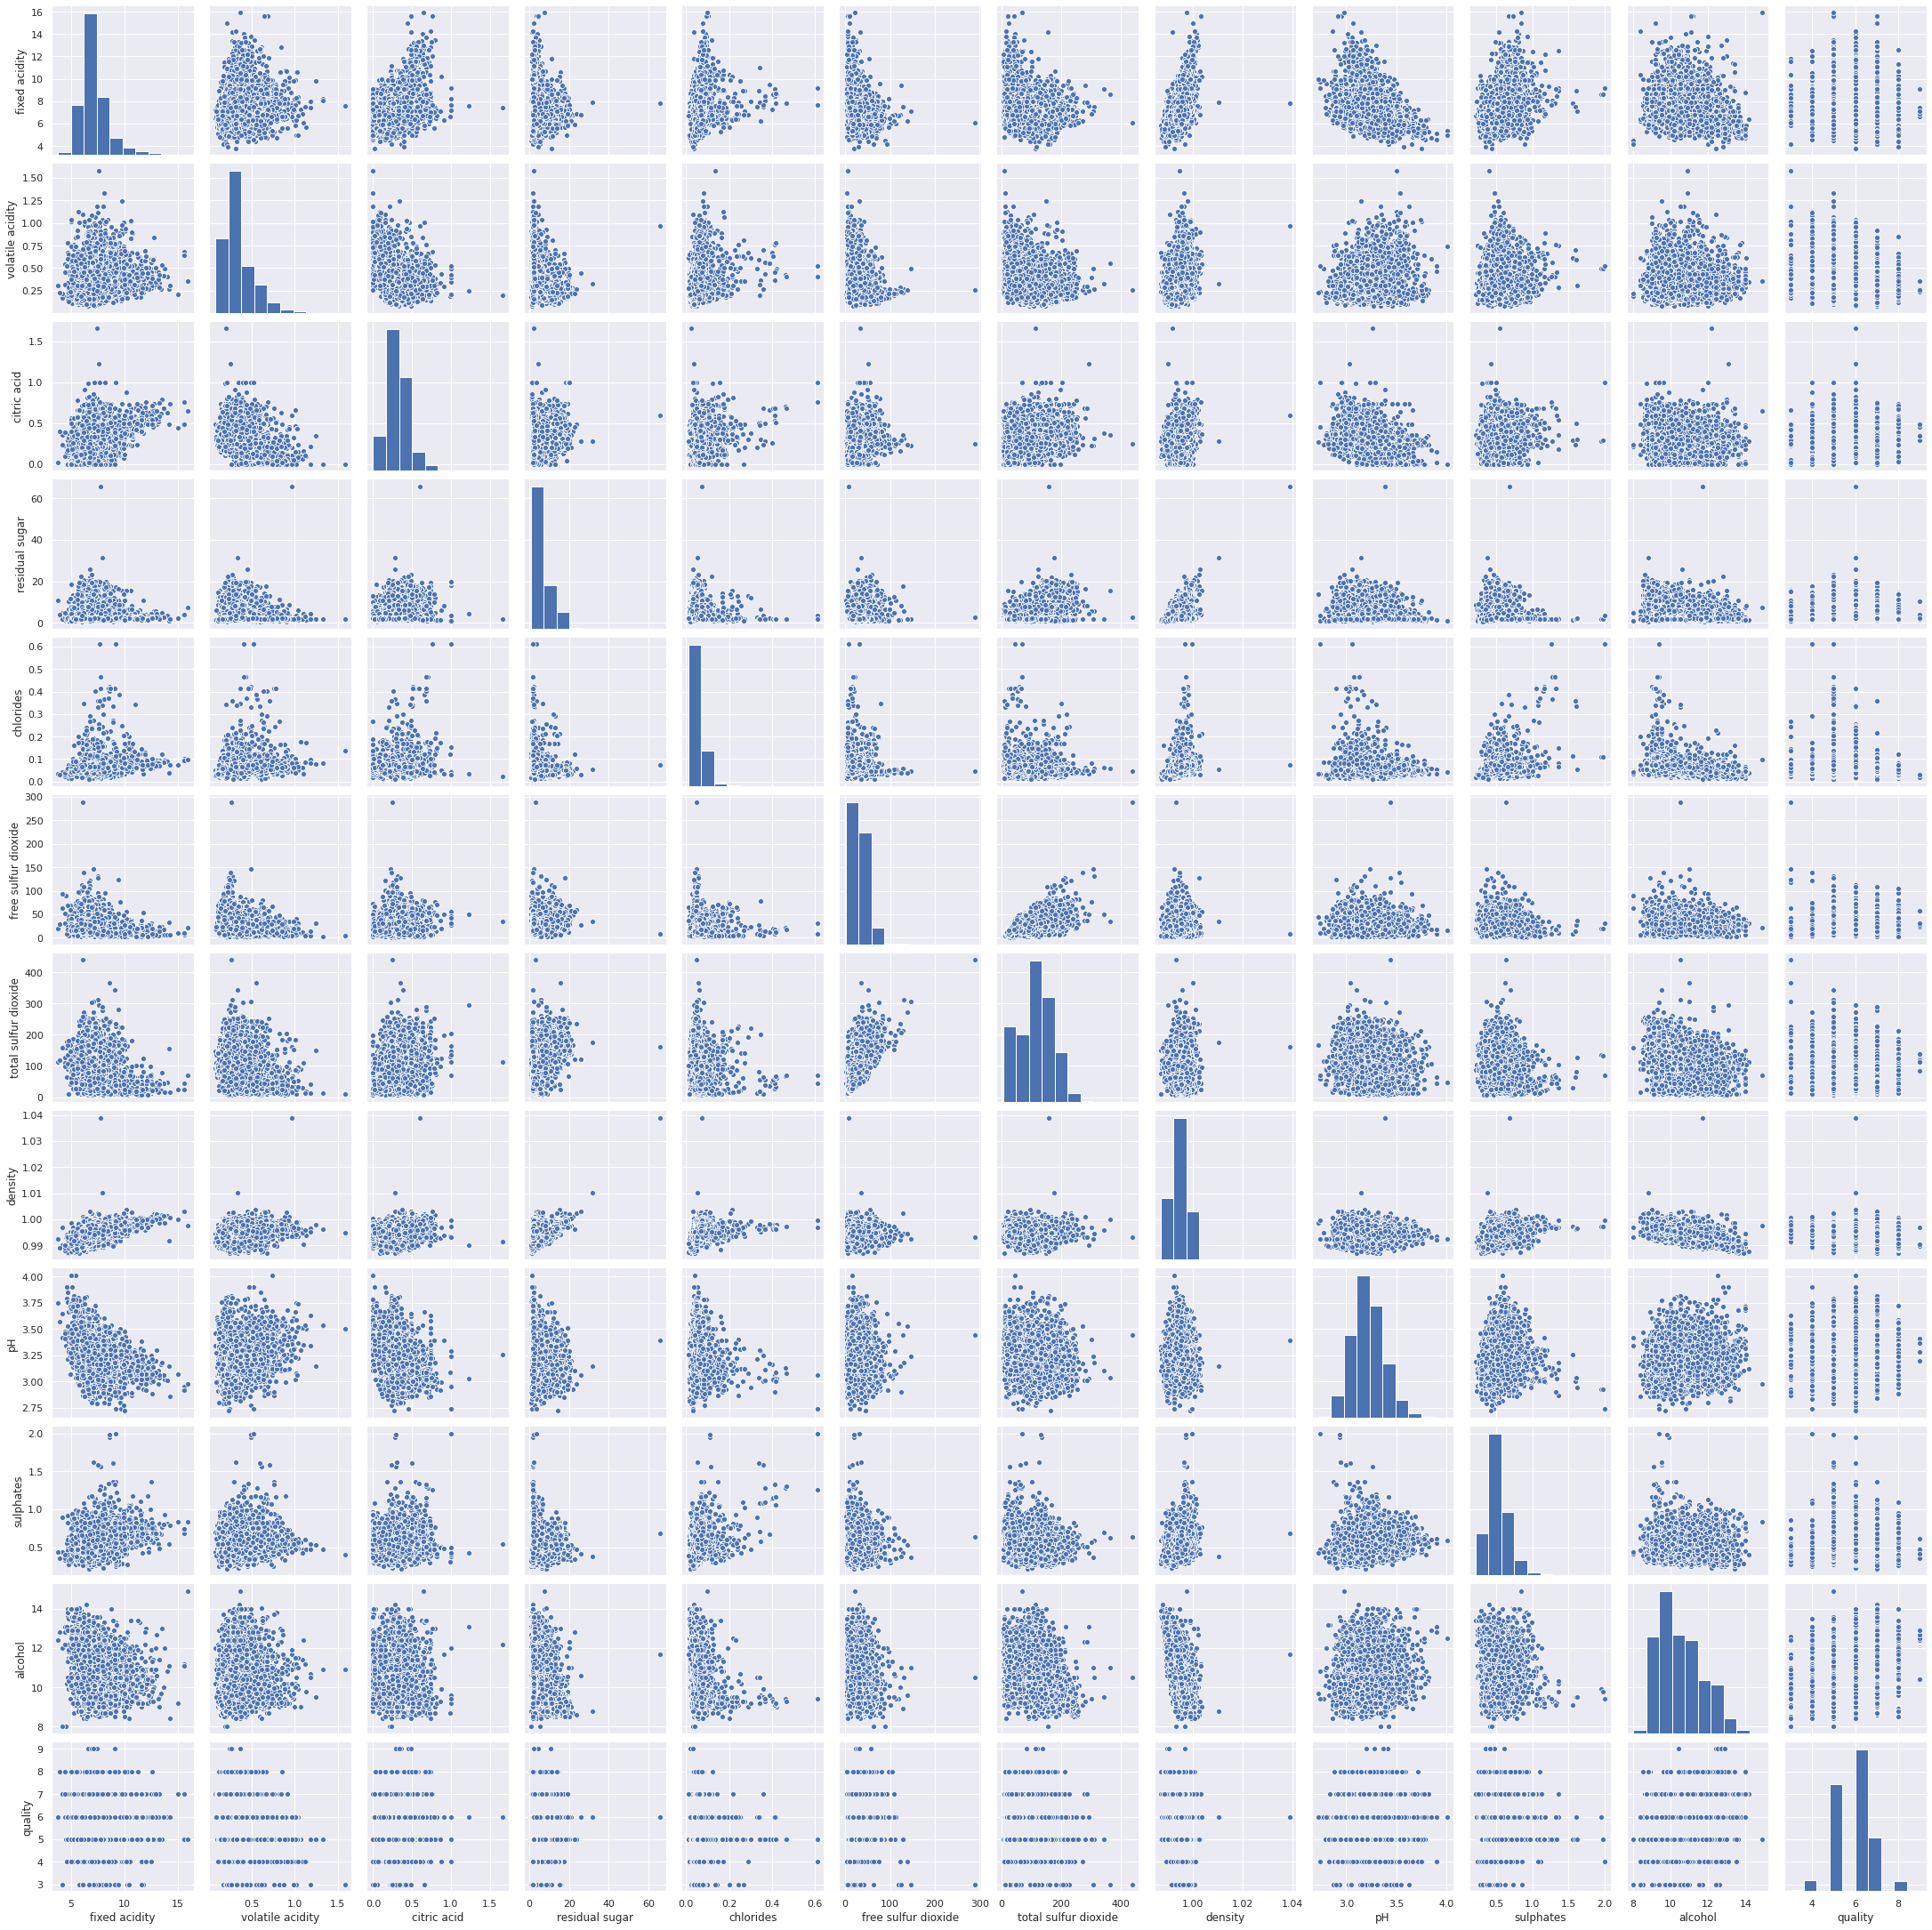

In [9]:
sns.set()
sns.pairplot(df)
plt.show()

### 2.3.5 Сбаласинрованность классов

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

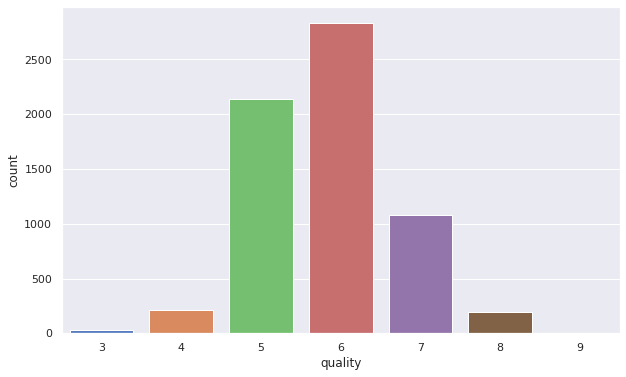

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(df["quality"], palette="muted")
df["quality"].value_counts()

# 3. Data Preparation

## 3.1 Категориальные переменные должны быть преобразованы в числовые переменные

In [11]:
df = pd.get_dummies(data = df, columns = ['type'] , prefix = ['type'] , drop_first = True)

## 3.2 Заполнить пропущенные значения в переменных

In [12]:
df = df.fillna(df.median())
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_white              0
dtype: int64

## 3.3 Подбираем балансировку классов по методу OverSampling и модель обучения

In [43]:
from imblearn.over_sampling import RandomOverSampler,BorderlineSMOTE
from collections import Counter
from sklearn import metrics, ensemble, linear_model
from sklearn.model_selection import  StratifiedKFold,cross_validate,cross_val_score,learning_curve,GridSearchCV,RandomizedSearchCV 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
scoring = ['precision_macro', 'recall_macro', 'f1_macro']

# кросс-валидаторы и скореры
skf = StratifiedKFold(n_splits = 5, shuffle = True)
#scorers = ['recall']
# Модели
clr = linear_model.LogisticRegression(C=1000, penalty='l2', n_jobs=-1, random_state = 1,solver='liblinear',multi_class = 'auto')
crf = ensemble.RandomForestClassifier(random_state = 1)
cgb = ensemble.GradientBoostingClassifier(n_estimators = 100, random_state = 1)



#print ('Count class: {}'.format(sorted(Counter(df['quality']).items())))

# Простое дублирование минорного класса существующими объектами
rosRand = RandomOverSampler(random_state=1)
X_res, Y_res = rosRand.fit_sample(df.drop('quality',axis=1), df['quality'])
#print ('Resampled random count class: {}'.format(sorted(Counter(Y_res).items())))

print('Type OverSampling => RandomOverSampler')
scores = cross_validate(clr, X_res, Y_res, scoring=scoring, cv=skf, return_train_score=False)
#print(scores)
print("LR precision (macro): {:.2f} (+/- {:.2f})".format(scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))    
print("LR recall (macro): {:.2f} (+/- {:.2f})".format(scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))    
print("LR F1 (macro): {:.2f} (+/- {:.2f})".format(scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))    

scores = cross_validate(crf, X_res, Y_res, scoring=scoring, cv=skf, return_train_score=False)
print("RF precision (macro): {:.2f} (+/- {:.2f})".format(scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))    
print("RF recall (macro): {:.2f} (+/- {:.2f})".format(scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))    
print("RF F1 (macro): {:.2f} (+/- {:.2f})".format(scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))    

scores = cross_validate(cgb, X_res, Y_res, scoring=scoring, cv=skf, return_train_score=False)
print("GB precision (macro): {:.2f} (+/- {:.2f})".format(scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))    
print("GB recall (macro): {:.2f} (+/- {:.2f})".format(scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))    
print("GB F1 (macro): {:.2f} (+/- {:.2f})".format(scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))    


# дублирование минорного класса новыми интерполированными объектами. SMOT алгоритм  
rosSMOTE_1 = BorderlineSMOTE(random_state=1)
X_res, Y_res = rosSMOTE_1.fit_sample(df.drop('quality',axis=1), df['quality'])
#print ('Resampled random count class: {}'.format(sorted(Counter(Y_res).items())))

print('Type OverSampling => BorderlineSMOTE')
scores = cross_validate(clr, X_res, Y_res, scoring=scoring, cv=skf, return_train_score=False)
#print(scores)
print("LR precision (macro): {:.2f} (+/- {:.2f})".format(scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))    
print("LR recall (macro): {:.2f} (+/- {:.2f})".format(scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))    
print("LR F1 (macro): {:.2f} (+/- {:.2f})".format(scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))    

scores = cross_validate(crf, X_res, Y_res, scoring=scoring, cv=skf, return_train_score=False)
print("RF precision (macro): {:.2f} (+/- {:.2f})".format(scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))    
print("RF recall (macro): {:.2f} (+/- {:.2f})".format(scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))    
print("RF F1 (macro): {:.2f} (+/- {:.2f})".format(scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))    

scores = cross_validate(cgb, X_res, Y_res, scoring=scoring, cv=skf, return_train_score=False)
print("GB precision (macro): {:.2f} (+/- {:.2f})".format(scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))    
print("GB recall (macro): {:.2f} (+/- {:.2f})".format(scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))    
print("GB F1 (macro): {:.2f} (+/- {:.2f})".format(scores['test_f1_macro'].mean(), scores['test_f1_macro'].std() * 2))    



Type OverSampling => RandomOverSampler
LR precision (macro): 0.45 (+/- 0.02)
LR recall (macro): 0.48 (+/- 0.02)
LR F1 (macro): 0.46 (+/- 0.02)
RF precision (macro): 0.93 (+/- 0.01)
RF recall (macro): 0.93 (+/- 0.01)
RF F1 (macro): 0.93 (+/- 0.00)
GB precision (macro): 0.78 (+/- 0.01)
GB recall (macro): 0.79 (+/- 0.01)
GB F1 (macro): 0.78 (+/- 0.01)
Type OverSampling => BorderlineSMOTE
LR precision (macro): 0.43 (+/- 0.02)
LR recall (macro): 0.44 (+/- 0.02)
LR F1 (macro): 0.43 (+/- 0.02)
RF precision (macro): 0.74 (+/- 0.00)
RF recall (macro): 0.74 (+/- 0.00)
RF F1 (macro): 0.74 (+/- 0.00)
GB precision (macro): 0.62 (+/- 0.01)
GB recall (macro): 0.63 (+/- 0.01)
GB F1 (macro): 0.63 (+/- 0.01)


#### Из двух алгоритов балансировки классов и 3 моделей обучения выбираем: OverSampling => RandomOverSampler и RandomForestClassifier

## 3.4 Сборка финальных датасетов для моделирования

### 3.4.1 Создание датасетов для обучения и проверки

Отделяем данные для обучения и для проверки

In [45]:
rosRand = RandomOverSampler(random_state=1)
X_res, Y_res = rosRand.fit_sample(df.drop('quality',axis=1), df['quality'])

X_train, X_test, y_train, y_test =train_test_split(X_res,Y_res,test_size=0.30,random_state=22)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(13896, 12) (5956, 12) (13896,) (5956,)


# 4. Моделирование
Теперь мы выберем модель, которую хотели бы попробовать. Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

## 4.1 Обучение модели

In [51]:
crf = ensemble.RandomForestClassifier(random_state = 1)
crf.fit(X_train,y_train)
y_predict=crf.predict(X_test)


# 5. Оценка
Теперь оценим модель


In [52]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       835
           4       0.98      1.00      0.99       834
           5       0.79      0.83      0.81       854
           6       0.78      0.66      0.71       865
           7       0.88      0.94      0.91       871
           8       1.00      1.00      1.00       845
           9       1.00      1.00      1.00       852

    accuracy                           0.92      5956
   macro avg       0.92      0.92      0.92      5956
weighted avg       0.92      0.92      0.92      5956



# 6. Развертывание

#### Модель готова и готова к развертыванию. Так как изначально оценки были разбалансированны, а некоторых вообще не было, то модель нужно переиодически переобучать, для более корректного предсказания.